## Introduction to Machine Learning

### What we will (and won't) be covering

* What to expect (Goals by end of course)
    * Understanding of the different machine learning paradigms
    * Capability  
    * Understanding of cost functions and the thoeory of gradient descent
    * How to frame a Supervised machine learning problem in both a regression and classification setting
    * Theorhetical understanding of a few differnt basic ML algorythms
    * Theorhtical understanding of proper training and evaluation
    * Understand the Sklearn API
    * Applied use of variaous ML problems with a variety of datasets across entire pipeline
        *  data exploration -> Frame problem -> feature selection / transforamtion -> train -> evaluate  

### High Level Theorhetical Overview of ML types Supervised, Unsupervised, and Semi-supervised Learning
 
### Supervised Learning   

* What does training data look like?
    * What are labels / targets
    * How to treat categorical variables
        * One-hot encoding
    * Data shape

### Define Regression vs Classificatin Problems
 
### Discussion of Data Challenges in ML

### Various methods to frame machine learning problems

### Discuss Proper fit of model (under, over, etc.)

### Discuss Data Splitting Strategies and Theory

### Discuss Scaling Theory

### Discuss sklearn API

* Toy example?
  
### Introduce SARS Atmospheric Data

### EDA

### Train binary classifier with two features and plot decision boundaries 

### 

## So what constitutes "Machine Learning"?

Interesting question.

### Machine Learning Paradigms

#### Unsupervised

#### Supervised

#### Semi-supervised

#### Reinforcement Learning

# The Sklearn (Sci-kit Learn) API

# Unsupervised Learning

There is a LOT of unlabeled data out in world, and is especially true within the Atmospheric sciences. Unsupervised learning can be useful in identifing patterns / regimes, generally categorized into *clusters*, in data without the need for human labeling campaigns. Other use cases include anomoly detection and generative approaches to generate realistic looking data. Unsupervisedd learning can be combined with supervised learning to make better use of a small amounts of labeled data. There are a wide variety of clustering algorithms and there is no one-size-fits all approach, as they are all dta dependent and have various constraints attached to them.

#### Soft (fuzzy) clustering vs hard clustering

Hard clustering does not provide a probability or uncertainty estimate, it only provides the assigned cluster. Soft clustering allows data points to be members of multiple clusters, often (but not always) in the form of a probability of belonging to a particular cluster assignment. K-means and Spectral clustering are examples of a hard clustering approach, whereas FLAME clsutering and or a Gaussian Mixture Model (GMM) could be considered a soft clustering apprach.

#### Out-of-sample prediction

Some algorithms provide the ability to make predictions on data not seen in the "training" data used to fit the model. However, many clustering algorithms are constrained here and can only provide information using the data it was fit to. This is fine for many applications, but highly undesireable for others. ...

#### Synthetic data sampling

You've probably seen synthetic examples of human faces or artwork generated by unsupervised networks. There are many Neural network architectures such as generative adversarial networks (GANs) or variational autoencoders (VAEs) that operate in an unsupervised fashion. They learn to represent the data they see in a latent space, and can effectively sample from this space to generate new samples from. However those types of networks are out of scope for this tutorial, but we'll take a look at a Gaussian Mixture Model which is an unsupervised generative approach. 

#### Computational Considerations

Most of the data we'll be dealing with will not be constrained by computation, but with very large, high-dimensional data, scaling becomes important and be a limiting factor when choosing the right algorithm for the job.

#### General classes of clustering algorithms

* Density-based (DBSCAN)
* Centroid based (K-means)
* Distrbution based (GMM)
* Hierarchical-based

Will take a peek at three 

### The *K-Means* Algorithm

The K-means algorithm is a foundational clustering algorithm. See the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
* Hard clustering - each data point can only belong to a specific cluster
* Does provide out-of-sample prediction
* Not a generative approach
* Computationally cheap
* Is used "behind the hood" in many other clustering techniques
* Assumes clusters to be in n-dimensional "spheres" (constraint from being based on euclidean distance) 


Given a data set, it divides it into 𝑘 (user-specified) clusters in a way that attempts to minimise the average Euclidean distance from a point to the center of its clusters.

#### The Expectation-Maximization algorythm (EM)

Function to minimize:
$$J=\sum_{i=1}^{m} \sum_{k=1}^{K} w_{ik}||x_i-\mu_k||^2$$

**Initialization**: Randomly assign a location for each cluster centroid location

**E-step**: Assign each point to the nearest cluster (centroid based)

**M-Step**: Calculate Euclidean distance from each point / cluster pair; assign new custer centroid

**Iterate between E and M steps** until specified convergence


For each observation 𝑗
, set 𝑟𝑗,𝑘∗=1
 and 𝑟𝑗,𝑘=0
 for 𝑘≠𝑘∗
, where 𝑘∗
 is the index of the closest cluster center:
𝑘∗=argmin𝑘 ||𝑥𝑗−𝜇𝑘||2
M-step: For each cluster 𝑗
, re-estimate the cluster center as the mean of the points in that cluster:
𝜇new𝑘=∑𝑁𝑗=1𝑟𝑗,𝑘𝑥𝑗∑𝑁𝑗=1𝑟𝑗,𝑘

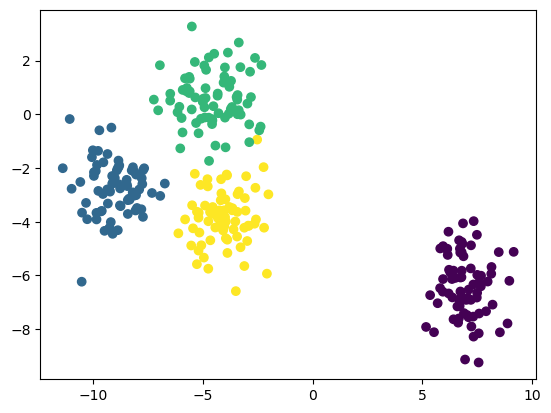

In [462]:
# toy example k-means with blobs
from sklearn.datasets import make_circles, make_classification, make_moons, make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples=300, n_features=2, centers=4, random_state=15)
plt.scatter(x[:, 0], x[:, 1], c=y)

In [459]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init="auto", verbose=1) # Initialize KMeans with 4 specified clusters 
km.fit(x) # fit it with our data

Initialization complete
Iteration 0, inertia 928.9619888469642.
Iteration 1, inertia 607.6012300373118.
Iteration 2, inertia 600.6043280097722.
Converged at iteration 2: strict convergence.


KMeans(n_clusters=4, n_init='auto', verbose=1)

In [463]:
km.cluster_centers_

array([[ 6.95733962, -6.38286713],
       [-4.06159146, -3.86052133],
       [-8.98187334, -2.77495731],
       [-4.53893141,  0.58557895]])

(-12.0, 10.0)

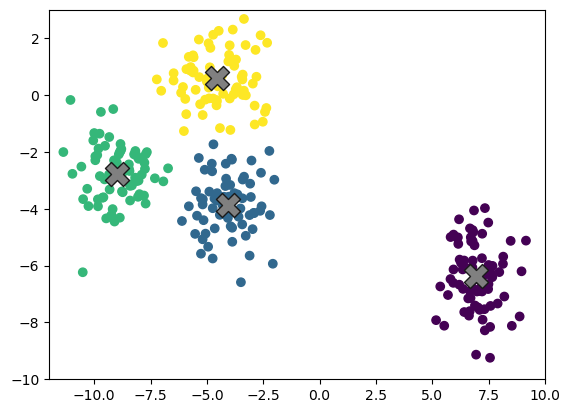

In [477]:
y_hat = km.predict(x)  # predict cluster assignments with our data
plt.scatter(x[:, 0], x[:, 1], c=y_hat)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='X', s=300, color='grey', edgecolor='k')
plt.ylim(-10, 3)
plt.xlim(-12, 10)

Here we can try to use our Model on some other randomly fit data, and as we expect, it doesn't look good.

(-12.0, 10.0)

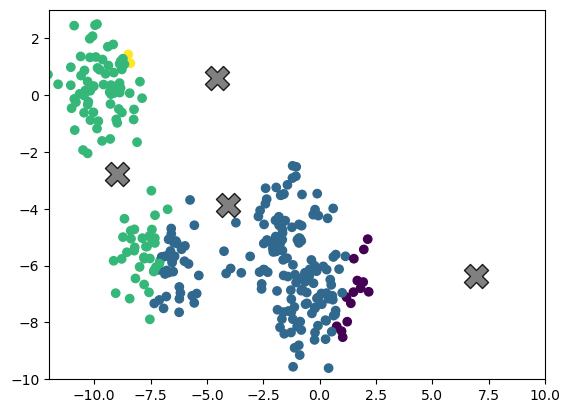

In [478]:
x1, y1 = make_blobs(300, n_features=2, centers=4, random_state=9)
y_hat1 = km.predict(x1)
plt.scatter(x1[:, 0], x1[:, 1], c=y_hat1)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='X', s=300, color='grey', edgecolor='k')

plt.ylim(-10, 3)
plt.xlim(-12, 10)

In [78]:
# interactive example with blobs and moons

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, widget
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs, make_moons
import warnings
warnings.filterwarnings("ignore")

def plot_kmeans_interactive(min_clusters=1, max_clusters=6, blob_seed=1, init_seed=1, kind='blobs'):
    
    if kind == 'blobs':
        X, y = make_blobs(n_samples=300, centers=6, center_box=(-15, 15),
                          random_state=blob_seed, cluster_std=3.60)

    elif kind == 'moons':
        X, y = make_moons(n_samples=300, noise=0.1, random_state=blob_seed)
        X[:, 0] *= 10
        X[:, 1] *= 15
    
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis_r',
                    vmin=0, vmax=n_clusters - 1);

            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', edgecolor='k',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis_r')
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', edgecolor='w',
                    c='k', s=100)
            

    def _kmeans_step(frame=0, n_clusters=4):
        np.random.seed(init_seed)
        labels = np.zeros(X.shape[0])
        centers_x = np.random.uniform(-15, 15, [n_clusters, 1])
        centers_y = np.random.uniform(-2, 10, [n_clusters, 1])
        centers = np.concatenate([centers_x, centers_y], axis=1)
        nsteps = frame // 3
        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(axis=0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-20, 20)
        plt.ylim(-20, 20)

        if frame % 3 == 1:
            plt.text(-18.5, 18.5, "M-Step: Reassign points to nearest centroid",
                     ha='left', va='top', size=12)
        elif frame % 3 == 2:
            plt.text(-18.5, 18.5, "E-step: Update centroids to cluster means",
                     ha='left', va='top', size=12)
        elif frame == 0:
            plt.text(-18.5, 18.5, "Randomly initialize centroid for each cluster",
                     ha='left', va='top', size=12)
    
    return interact(_kmeans_step, frame=widgets.IntSlider(min=0, max=50, step=1, value=0),
                    n_clusters=np.arange(min_clusters, max_clusters + 1))

In [81]:
plot_kmeans_interactive(min_clusters=1, max_clusters=8, blob_seed=10, init_seed=1, kind='blobs');

interactive(children=(IntSlider(value=0, description='frame', max=50), Dropdown(description='n_clusters', inde…

In [154]:
plot_kmeans_interactive(min_clusters=1, max_clusters=8, blob_seed=10, init_seed=1, kind='moons');

interactive(children=(IntSlider(value=0, description='frame', max=50), Dropdown(description='n_clusters', inde…

The "moons" data is an excelelnt example of a simple 2D data shape that cannot be captured by the KMeans algorithm, regardless of how many clusters we try. Test out a variety of cluster configurations... You'll see that it always converges to clustering in spherical-like "blobs" due to its minimization of Euclidean distance.


The moons data seems like a good candidate for a density-based (connectivity based) method, as the clusters are "densly connected" but don't represent a known distribution etiher.  

### The DBSCAN (Density based) algorithm 

The DBSCAN algorithm identifies clusters as sets of connected core points. Each cluster contains a group of data points that are closely related to each other in terms of density. The noise points are typically discarded or labeled as outliers. DBSCAN groups data points into clusters by identifying dense regions of points connected by core points. It is a versatile algorithm that can find clusters of arbitrary shapes and is robust to noise in the data. Its performance is influenced by the choice of parameters (ε and MinPts), so tuning these parameters is an important aspect of using DBSCAN effectively for a specific dataset.

Step by step process:

1. Define the parameters:

    **Epsilon (ε)**: This is the radius around a data point. It determines the neighborhood of a data point. It's used to identify whether a data point is a core point, border point, or noise point.

    **MinPts**: This is the minimum number of data points required to form a dense region (core point). Any cluster should have at least MinPts core points within its ε-neighborhood.
    

2. Initialize the algorithm:

   Start with an arbitrary data point that has not been visited.


3. Find the ε-neighborhood:

    For the current point, find all data points that lie within its ε-radius (including itself). These points become part of the current cluster.

4. Check if it's a core point:

    If the number of data points in the ε-neighborhood is greater than or equal to MinPts, mark the current point as a core point. Otherwise, mark it as a border point.

5. Expand the cluster:

    If the current point is a core point, expand the cluster by recursively visiting all unvisited data points within its ε-neighborhood. For each of these points, repeat the process from steps 3 to 5.

6. Terminate the cluster:

    Once no more unvisited data points can be added to the cluster, mark it as completed.

7. Repeat the process:

    Select another unvisited data point and repeat the above steps. Continue this process until all data points have been visited.

8. Identify noise:
   
    Any data points that were not included in any cluster during the above steps are considered noise points. These are isolated data points that don't belong to any cluster.

9. Output the clusters:

    The algorithm identifies clusters as sets of connected core points. Each cluster contains a group of data points that are closely related to each other in terms of density. The noise points are typically discarded or labeled as outliers.

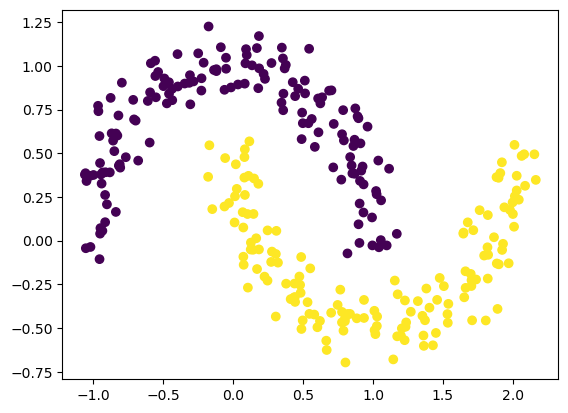

In [94]:
# demonstrate working on moons and not working with incorrect hyperparamters 
x_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=11)
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=y_moons)

In [138]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1)
dbscan_yhat = dbscan.fit_predict(x_moons)
dbscan_yhat

array([11, -1,  0,  9, -1, -1,  1, 12,  2,  3, -1, -1,  4,  2, -1,  2,  4,
        2,  3,  5,  6, -1, -1,  7,  6,  4,  5,  8, -1, -1,  6,  7,  3,  5,
        3,  5, -1, 10,  2, -1,  0,  9,  7, -1,  8, -1,  0,  3,  2,  3,  2,
        4, -1,  4,  3, -1,  7,  7, -1,  3, 10,  3,  2, -1,  1, -1, -1, -1,
        4,  5,  0,  0,  1,  3, -1, -1, 11, 11,  0, -1,  1, 13, -1,  5, -1,
        9, -1,  5, -1, 12, 10, -1,  5, -1, -1, -1,  4,  9, 11, 13,  9, -1,
        3,  4,  2,  3,  3,  9,  9, -1, 14, -1, -1,  0,  4,  0,  0, 14,  2,
        0, -1, -1, -1,  3,  2,  0, -1, -1,  8, -1, -1, 12,  2,  4, 13, -1,
        3, -1,  9,  7,  8,  4, 10, 14,  3,  9, 11,  0,  2, -1, -1,  2, -1,
       15,  7, 13, -1,  0,  0, 15,  4,  1, -1,  9,  0,  2,  1,  7,  2,  2,
        2,  6,  9, -1,  3, -1,  2,  6,  1,  0,  6,  8, -1,  2,  2,  2,  3,
        0,  2, -1, -1, -1,  7, -1, -1,  2, 11, -1, -1,  0, -1,  6, 15,  3,
       11, 14, -1,  4,  0,  2, -1,  4,  4,  6, 11, 12, 10,  8,  0,  3,  0,
       15,  9, -1,  3,  4

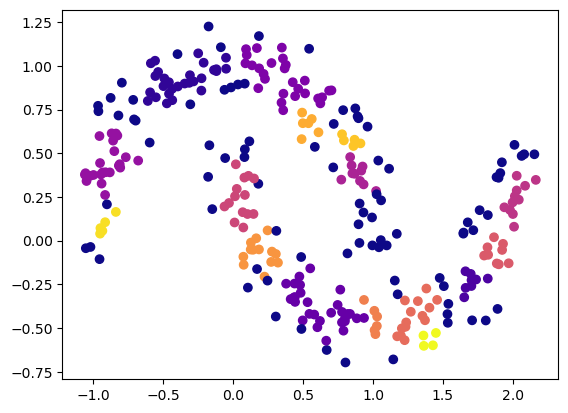

In [479]:
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=dbscan_yhat, cmap='plasma')

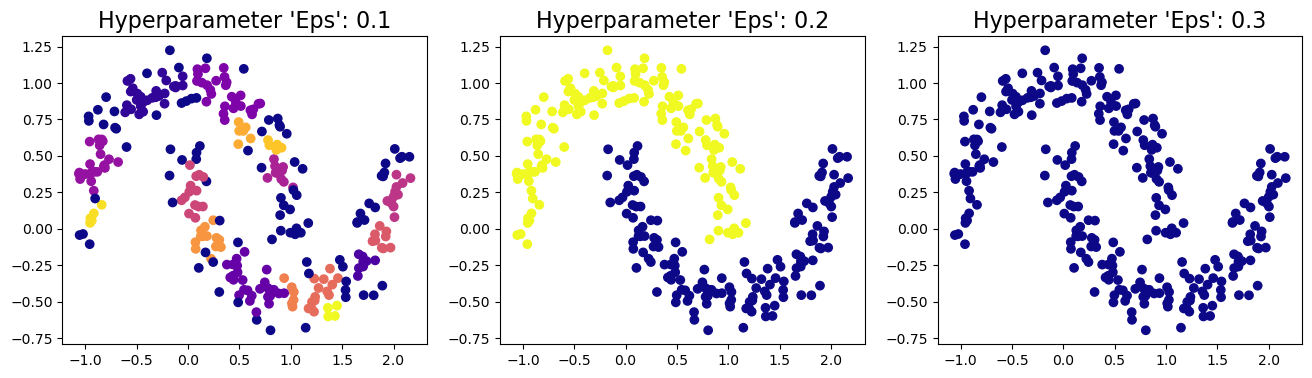

In [480]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
eps_values = [0.1, 0.2, 0.3]
for i, ax in enumerate(axes.ravel()):
    eps = eps_values[i]
    db_model = DBSCAN(eps=eps)
    db_model_yhat = db_model.fit_predict(x_moons)
    ax.scatter(x_moons[:, 0], x_moons[:, 1], c=db_model_yhat, cmap='plasma')
    ax.set_title(f"Hyperparameter 'Eps': {eps}", fontsize=16)

## Gaussian Mixture Modeling (GMM)

A Gaussian Mixture Model (GMM) is a probabilistic model which can be used for clustering, density estimation, anomoly detection, and generative modeling. GMMs are flexible and can often capture complex data distributions. It represents a dataset as a mixture of multiple Gaussian (normal) distributions where each Gaussian component in the mixture model describes a cluster within the data, and the model quantifies the likelihood of a data point belonging to each of these clusters. GMMs operate with the assumption that the underlying distribution is a combination of different Gaussian patterns.

GMMs use the Expectation-Maximization (EM) algorithm to iteratively estimate the parameters of the Gaussian components, which in turn allows for clustering data points into K components and provides a probability density estimation for each data point. The general process is similar to how we iterated through KMeans, however now we are maxmizing loglikehood and taking the variance of each distribution into account.

1. Initialize the parameters:

    Determine the number of components (Gaussians) in the mixture model, denoted as "K."
    Initialize the parameters for each Gaussian component, including the mean, covariance matrix, and mixing coefficient. This is defaulted in sklearn to using KMeans for initialization.
   
2. Expectation-Maximization (EM) algorithm:

   GMM employs the Expectation-Maximization (EM) algorithm, which consists of two main steps:

    a. **E-step**: Calculate the posterior probabilities of each data point belonging to each Gaussian component. This is done using Bayes' theorem.
    For each data point and each Gaussian component, compute the probability (responsibility) that the data point was generated by that component.

    b. **M-step**: Update the parameters of each Gaussian component based on the calculated responsibilities:
    * Updating the mean of each component as a weighted average of data points, where the weights are the responsibilities.
    * Updating the covariance matrix of each component based on the weighted covariance of data points.
    * Updating the mixing coefficient of each component as the average of the responsibilities.
    
3. Convergence:

    Iterate between the E-step and M-step until a convergence criterion is met. This is generally log-likelihood (specified tolerance defaulted to $1e^{-3}$, but you can also set a maximum number of iterations.

4. Cluster assignment:

    After convergence, each data point is assigned to the Gaussian component with the highest responsibility. This effectively clusters the data into K clusters based on the Gaussian components.

5. Probability density estimation:

    GMMs can also be used for density estimation. Once the model is trained, you can calculate the probability density for any point in the feature space. This can be useful for outlier detection and generative modeling.

We'll generate some synthetic data below and compare **KMeans** to a **GMM**. 

In [199]:
from numpy.random import multivariate_normal, uniform
import pandas as pd
def create_dataset(n_samples=3000):
    
  n_sample = n_samples//3
  data = np.zeros([n_samples, 3])

  data_0 = multivariate_normal(mean=[-1, 1], cov=[[2, 1],[1, 2]], size=(n_sample))
  data_1 = multivariate_normal(mean=[1, 4], cov=[[3, 1],[2, 1]], size=(n_sample))
  data_2 = uniform([3, -3], [10, 5], size=(n_sample, 2))

  # Merged all datapoints into one dataset
  data[:n_sample, :2] = data_0
  data[:n_sample, 2] = np.asarray([0]*n_sample)
  data[n_sample:2*n_sample, :2] = data_1
  data[n_sample:2*n_sample, 2] = np.asarray([1]*n_sample)
  data[2*n_sample:, :2] = data_2
  data[2*n_sample:, 2] = np.asarray([2]*n_sample)
  df = pd.DataFrame({'x':data[:,0], 'y':data[:,1], 'label':data[:,2].astype(int)})

  return df

df = create_dataset()

<Axes: xlabel='x', ylabel='y'>

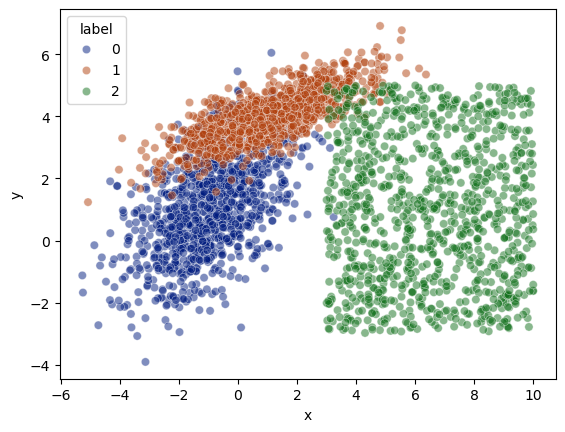

In [481]:
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='dark', alpha=0.5)

In [482]:
from sklearn.mixture import GaussianMixture
km = KMeans(n_clusters=3, random_state=88, verbose=0).fit(df.iloc[:, :2])
km_labels = km.predict(df.iloc[:, :2])
gmm = GaussianMixture(n_components=3, random_state=88, verbose=0).fit(df.iloc[:, :2])
gmm_labels = gmm.predict(df.iloc[:, :2])
gmm_probs = gmm.predict_proba(df.iloc[:, :2])

df['km_label'] = km_labels
df['gmm_label'] = gmm_labels
df[['gmm_prob_0', 'gmm_prob_1','gmm_prob_2']] = gmm_probs
df['label_prob'] = gmm_probs.max(axis=1)
df

# relabel arbitrary cluster assignments to match truth for plotting/color purposes 
relabel = np.choose(df['km_label'], [0,2,1]).astype(np.int64)
df['km_label'] = relabel

In [483]:
from sklearn.metrics import accuracy_score
print('KMeans accuracy: ', accuracy_score(df['label'], df['km_label']))
print('GMM accuracy: ', accuracy_score(df['label'], df['gmm_label']))

KMeans accuracy:  0.8506666666666667
GMM accuracy:  0.926


(-6.0, 10.0)

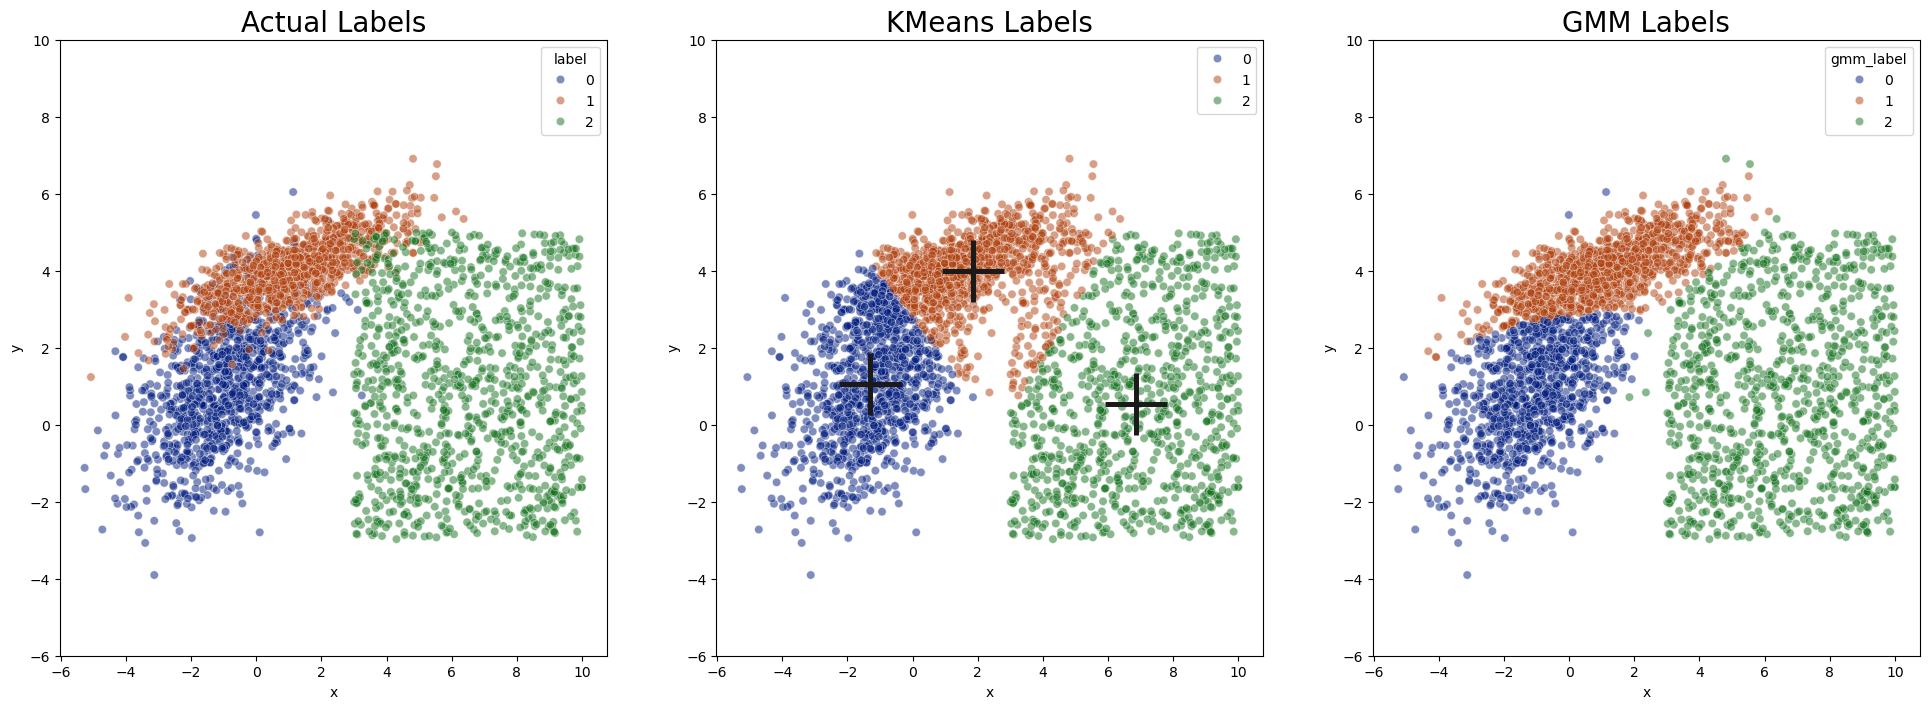

In [484]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='dark', ax=ax[0], alpha=0.5)
sns.scatterplot(data=df, x='x', y='y', hue='km_label', palette='dark', ax=ax[1], alpha=0.5)
sns.scatterplot(data=df, x='x', y='y', hue='gmm_label', palette='dark', ax=ax[2], alpha=0.5)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], marker='+', ax=ax[1], color='k', s=2000)
ax[0].set_title('Actual Labels', fontsize=20)
ax[1].set_title('KMeans Labels', fontsize=20)
ax[2].set_title('GMM Labels', fontsize=20)
ax[0].set_ylim(-6, 10)
ax[1].set_ylim(-6, 10)
ax[2].set_ylim(-6, 10)

<Axes: xlabel='x', ylabel='y'>

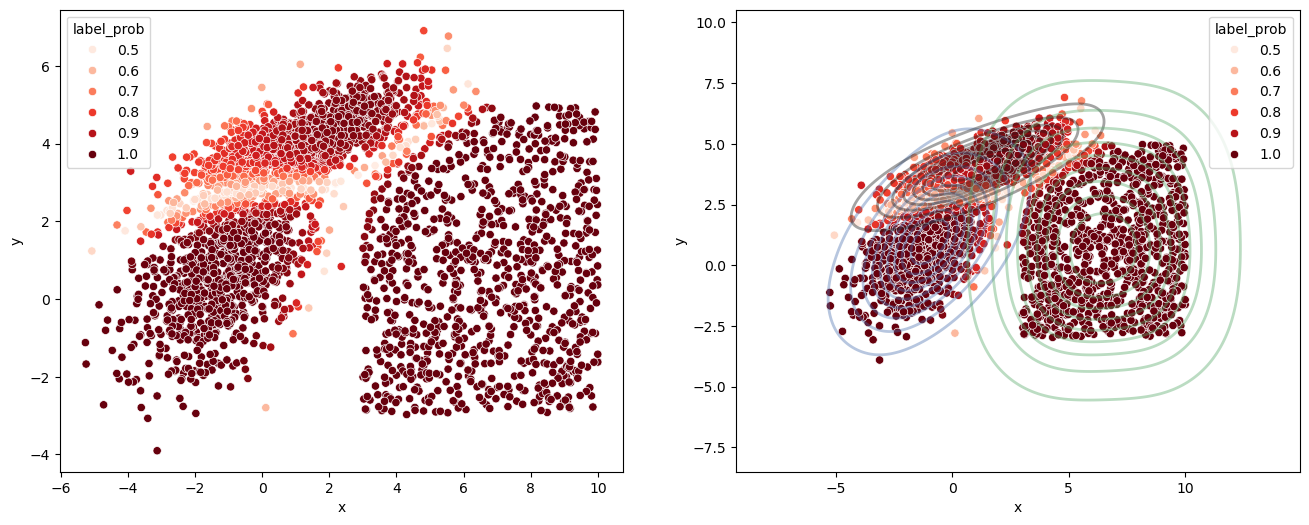

In [242]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(data=df, x='x', y='y', hue='label_prob', palette='Reds', ax=ax[0])
sns.scatterplot(data=df, x='x', y='y', hue='label_prob', palette='Reds', ax=ax[1])
sns.kdeplot(data=df[df['label']==0], x='x', y='y', shade=False, linewidths=2, bw=0.8, alpha=0.4, color='b', ax=ax[1])
sns.kdeplot(data=df[df['label']==1], x='x', y='y', shade=False, linewidths=2, bw=0.8, alpha=0.4, color='k', ax=ax[1])
sns.kdeplot(data=df[df['label']==2], x='x', y='y', shade=False, linewidths=2, bw=0.8, alpha=0.4, color='g', ax=ax[1])

Text(0.5, 1.0, 'Generated Samples from Gaussian Mixture Model')

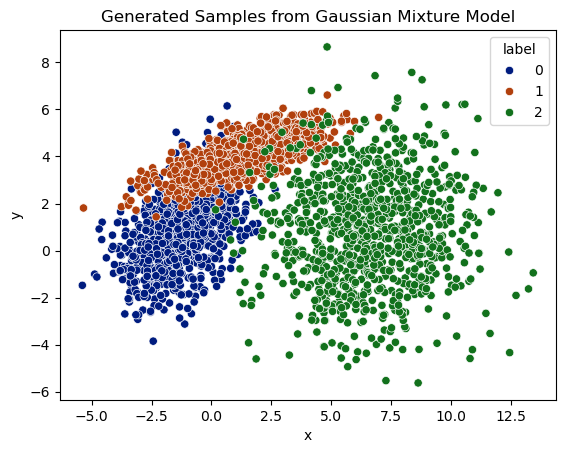

In [268]:
gmm_generated_x, gmm_generated_y = gmm.sample(3000)
df_gen = pd.DataFrame({'x': gmm_generated_x[:, 0], 'y': gmm_generated_x[:, 1], 'label': gmm_generated_y})
sns.scatterplot(data=df_gen, x='x', y='y', hue='label', palette='dark')
plt.title('Generated Samples from Gaussian Mixture Model')

# Introduce SARS Hail data 

In [8]:
# perform some EDA on certain features (function?)

In [279]:
hail = pd.read_parquet('/Users/cbecker/Downloads/SARS_hail.parquet')
hail

,ELEV,SIZE,MUCAPE,MUMR,500TEMP,300T,7-5 LR,5-3 LR,0-3SH,0-6SH,0-9SH,SRH3,SHIP,MODELb
155,824.0,3.00,1954.0,12.400000,-10.4,-35.200001,7.2,6.7,16.799999,29.500000,46.599998,233.0,1.2,2.8
961,79.0,1.00,4004.0,17.200001,-5.9,-31.100000,6.0,6.7,6.200000,4.600000,8.600000,46.0,0.3,0.6
195,872.0,2.75,3989.0,13.700000,-2.5,-33.900002,7.5,8.3,10.500000,14.900000,13.700000,146.0,0.8,2.0
94,357.0,3.75,2640.0,11.900000,-15.1,-42.700001,7.3,7.6,13.400000,24.000000,23.900000,187.0,2.0,2.3
918,1620.0,1.00,713.0,7.100000,-9.9,-37.099998,8.3,7.3,3.100000,14.700000,20.600000,12.0,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,4.0,1.75,2973.0,16.500000,-6.0,-31.299999,5.7,6.7,4.400000,5.900000,3.100000,33.0,0.2,0.6
856,396.0,1.00,1956.0,12.700000,-6.1,-34.700001,6.4,7.6,16.100000,23.500000,29.400000,149.0,0.5,1.4
580,124.0,1.75,5081.0,18.400000,-10.4,-36.400002,7.5,7.0,10.500000,7.900000,11.200000,157.0,1.0,0.9
287,438.0,2.75,1724.0,10.200000,-16.9,-44.000000,6.4,7.5,24.200001,33.200001,28.200001,289.0,1.3,2.2


In [277]:
def plot_two_vars(data, var_1, var_2, hue=None):

    sns.scatterplot(data=data, x=var_1, y=var_2, hue=hue, palette='dark')

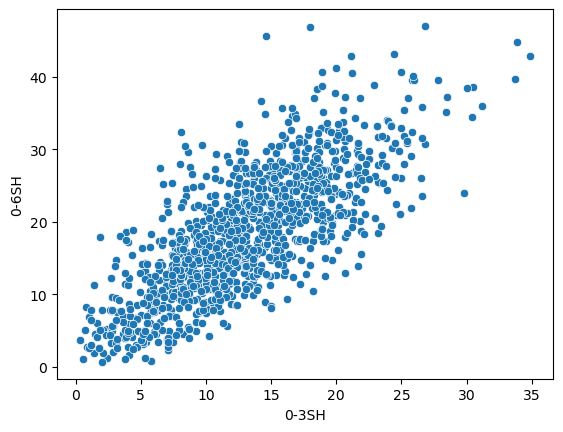

In [283]:
plot_two_vars(hail, '0-3SH', '0-6SH')

Text(0.5, 1.0, 'Elbow curve')

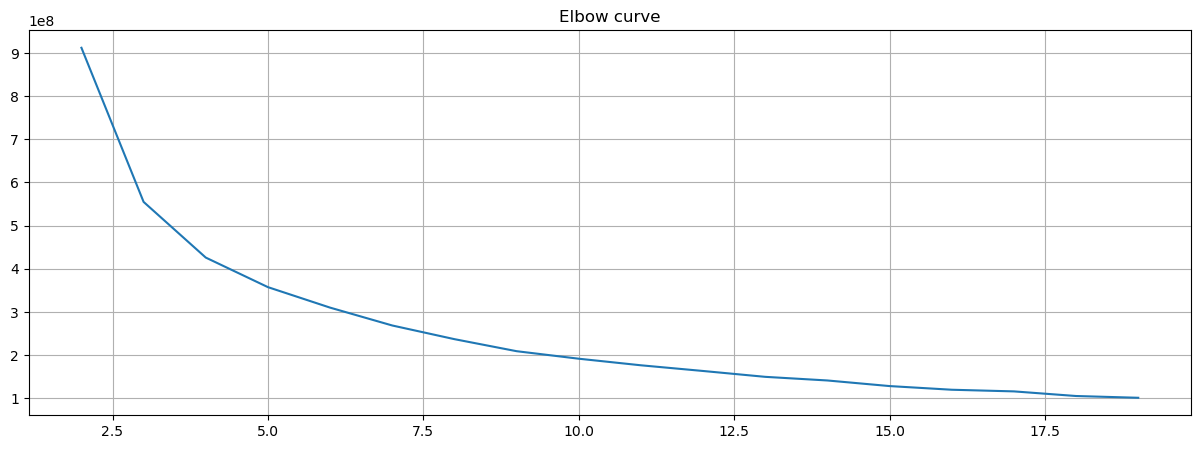

In [288]:
X = hail.drop('SIZE', axis=1)
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [352]:
supercell

,CAT,MLMIXR,ML CAPE,ML CIN,MLCL(MAGL),0-1SRH,0-6KT,STPC,500 T (C),500DIR,7-5 LR,0-3(KT),0-9(KT),0-3 KM SRH (M2/S2)
201,2.0,15.6,2612.0,-4.0,971.0,250.0,52.799999,5.7,-11.700000,260.0,8.6,45.500000,72.500000,337.0
706,0.0,14.0,3853.0,-58.0,1033.0,227.0,43.599998,5.8,-13.500000,250.0,7.4,27.500000,43.500000,247.0
444,1.0,15.2,2700.0,-10.0,801.0,171.0,47.000000,3.6,-10.900000,219.0,7.5,25.299999,68.400002,216.0
523,0.0,9.9,1306.0,-11.0,1121.0,172.0,50.599998,1.7,-17.299999,203.0,6.6,39.599998,44.099998,206.0
870,0.0,14.6,1425.0,-21.0,712.0,95.0,53.200001,1.2,-9.500000,238.0,5.9,38.099998,53.700001,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,12.8,1776.0,-6.0,916.0,106.0,37.000000,1.2,-13.000000,217.0,6.9,22.000000,45.000000,157.0
123,2.0,11.7,1189.0,-11.0,1302.0,251.0,72.400002,2.1,-13.600000,230.0,7.3,55.700001,66.800003,370.0
400,1.0,10.3,1602.0,-8.0,1272.0,103.0,41.599998,0.8,-12.300000,237.0,6.8,29.900000,68.199997,173.0
752,0.0,9.5,1004.0,-128.0,1142.0,153.0,30.200001,0.3,-13.400000,233.0,8.2,31.200001,63.299999,235.0


Text(0, 0.5, 'Inertia')

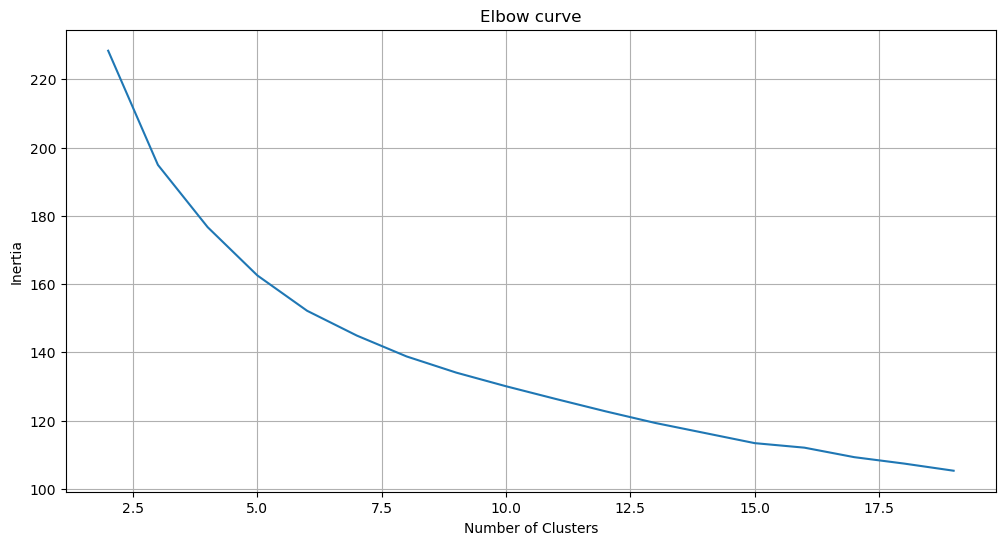

In [364]:
X = supercell.drop(['CAT'], axis=1)
X = MinMaxScaler().fit_transform(X)
inertias = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(2, 20), inertias)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [290]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [294]:
X = hail.drop(['SIZE', axis=1)
km = KMeans(n_clusters=5)
km_yhat = km.fit_predict(X)

In [295]:
silhouette_score(X, km_yhat)

0.33235168

In [297]:
silhouette_samples(X, km_yhat)

array([ 0.23962632,  0.30006558,  0.24983038, ...,  0.1607876 ,
       -0.00838279,  0.23632227], dtype=float32)

In [315]:
hail

,ELEV,SIZE,MUCAPE,MUMR,500TEMP,300T,7-5 LR,5-3 LR,0-3SH,0-6SH,0-9SH,SRH3,SHIP,MODELb
155,824.0,3.00,1954.0,12.400000,-10.4,-35.200001,7.2,6.7,16.799999,29.500000,46.599998,233.0,1.2,2.8
961,79.0,1.00,4004.0,17.200001,-5.9,-31.100000,6.0,6.7,6.200000,4.600000,8.600000,46.0,0.3,0.6
195,872.0,2.75,3989.0,13.700000,-2.5,-33.900002,7.5,8.3,10.500000,14.900000,13.700000,146.0,0.8,2.0
94,357.0,3.75,2640.0,11.900000,-15.1,-42.700001,7.3,7.6,13.400000,24.000000,23.900000,187.0,2.0,2.3
918,1620.0,1.00,713.0,7.100000,-9.9,-37.099998,8.3,7.3,3.100000,14.700000,20.600000,12.0,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,4.0,1.75,2973.0,16.500000,-6.0,-31.299999,5.7,6.7,4.400000,5.900000,3.100000,33.0,0.2,0.6
856,396.0,1.00,1956.0,12.700000,-6.1,-34.700001,6.4,7.6,16.100000,23.500000,29.400000,149.0,0.5,1.4
580,124.0,1.75,5081.0,18.400000,-10.4,-36.400002,7.5,7.0,10.500000,7.900000,11.200000,157.0,1.0,0.9
287,438.0,2.75,1724.0,10.200000,-16.9,-44.000000,6.4,7.5,24.200001,33.200001,28.200001,289.0,1.3,2.2


In [337]:
supercell = pd.read_parquet('/Users/cbecker/Downloads/SARS_supercell.parquet')
supercell

,CAT,MLMIXR,ML CAPE,ML CIN,MLCL(MAGL),0-1SRH,0-6KT,STPC,500 T (C),500DIR,7-5 LR,0-3(KT),0-9(KT),0-3 KM SRH (M2/S2)
201,2.0,15.6,2612.0,-4.0,971.0,250.0,52.799999,5.7,-11.700000,260.0,8.6,45.500000,72.500000,337.0
706,0.0,14.0,3853.0,-58.0,1033.0,227.0,43.599998,5.8,-13.500000,250.0,7.4,27.500000,43.500000,247.0
444,1.0,15.2,2700.0,-10.0,801.0,171.0,47.000000,3.6,-10.900000,219.0,7.5,25.299999,68.400002,216.0
523,0.0,9.9,1306.0,-11.0,1121.0,172.0,50.599998,1.7,-17.299999,203.0,6.6,39.599998,44.099998,206.0
870,0.0,14.6,1425.0,-21.0,712.0,95.0,53.200001,1.2,-9.500000,238.0,5.9,38.099998,53.700001,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,12.8,1776.0,-6.0,916.0,106.0,37.000000,1.2,-13.000000,217.0,6.9,22.000000,45.000000,157.0
123,2.0,11.7,1189.0,-11.0,1302.0,251.0,72.400002,2.1,-13.600000,230.0,7.3,55.700001,66.800003,370.0
400,1.0,10.3,1602.0,-8.0,1272.0,103.0,41.599998,0.8,-12.300000,237.0,6.8,29.900000,68.199997,173.0
752,0.0,9.5,1004.0,-128.0,1142.0,153.0,30.200001,0.3,-13.400000,233.0,8.2,31.200001,63.299999,235.0


In [491]:
hail[hail['MODELb'] > -998]

,ELEV,SIZE,MUCAPE,MUMR,500TEMP,300T,7-5 LR,5-3 LR,0-3SH,0-6SH,0-9SH,SRH3,SHIP,MODELb
155,824.0,3.00,1954.0,12.400000,-10.4,-35.200001,7.2,6.7,16.799999,29.500000,46.599998,233.0,1.2,2.8
961,79.0,1.00,4004.0,17.200001,-5.9,-31.100000,6.0,6.7,6.200000,4.600000,8.600000,46.0,0.3,0.6
195,872.0,2.75,3989.0,13.700000,-2.5,-33.900002,7.5,8.3,10.500000,14.900000,13.700000,146.0,0.8,2.0
94,357.0,3.75,2640.0,11.900000,-15.1,-42.700001,7.3,7.6,13.400000,24.000000,23.900000,187.0,2.0,2.3
918,1620.0,1.00,713.0,7.100000,-9.9,-37.099998,8.3,7.3,3.100000,14.700000,20.600000,12.0,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,4.0,1.75,2973.0,16.500000,-6.0,-31.299999,5.7,6.7,4.400000,5.900000,3.100000,33.0,0.2,0.6
856,396.0,1.00,1956.0,12.700000,-6.1,-34.700001,6.4,7.6,16.100000,23.500000,29.400000,149.0,0.5,1.4
580,124.0,1.75,5081.0,18.400000,-10.4,-36.400002,7.5,7.0,10.500000,7.900000,11.200000,157.0,1.0,0.9
287,438.0,2.75,1724.0,10.200000,-16.9,-44.000000,6.4,7.5,24.200001,33.200001,28.200001,289.0,1.3,2.2


In [486]:
supercell.to_parquet('/Users/cbecker/Downloads/SARS_supercell.parquet')

For n_clusters = 2 The average silhouette_score is : 0.3187496
For n_clusters = 3 The average silhouette_score is : 0.19072595
For n_clusters = 4 The average silhouette_score is : 0.15154707
For n_clusters = 5 The average silhouette_score is : 0.08597375
For n_clusters = 6 The average silhouette_score is : 0.013579546
For n_clusters = 7 The average silhouette_score is : 0.00801123
For n_clusters = 8 The average silhouette_score is : 0.0146146845


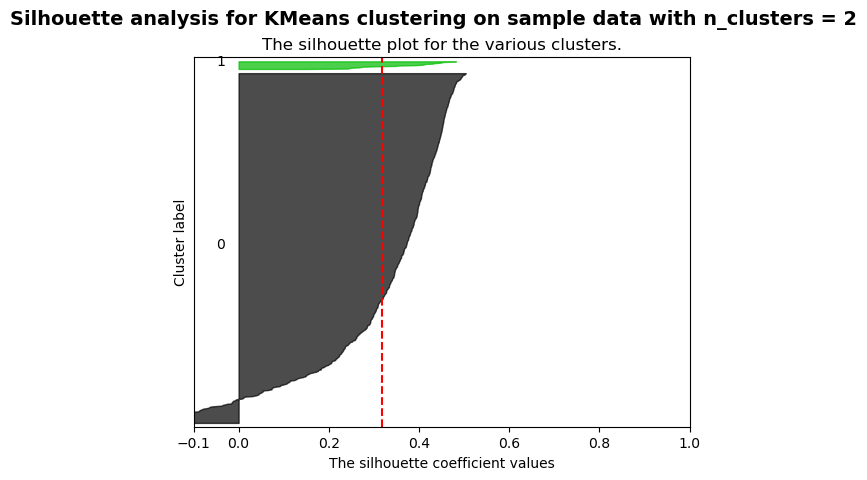

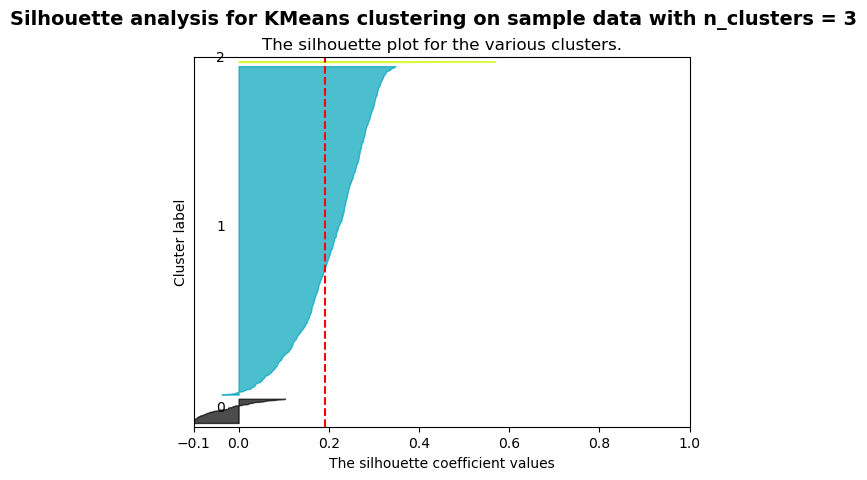

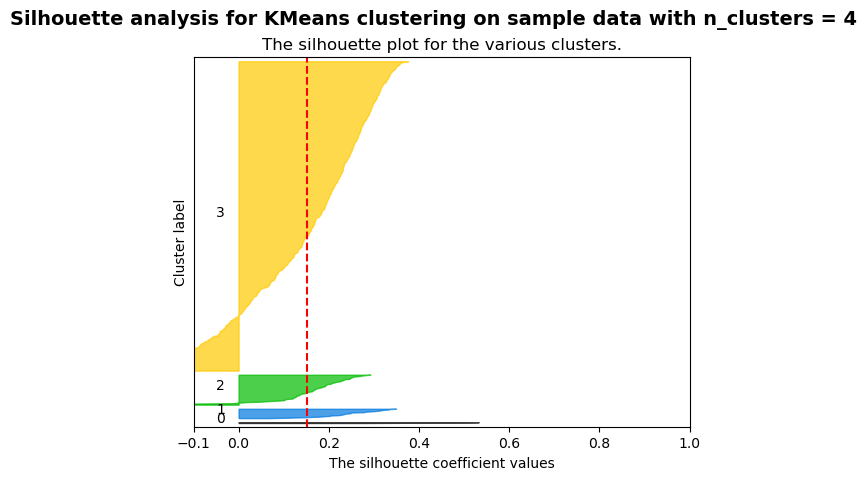

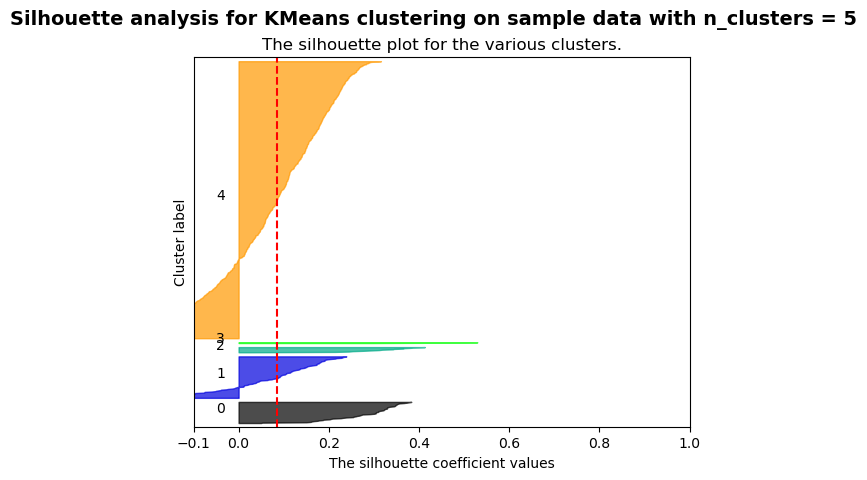

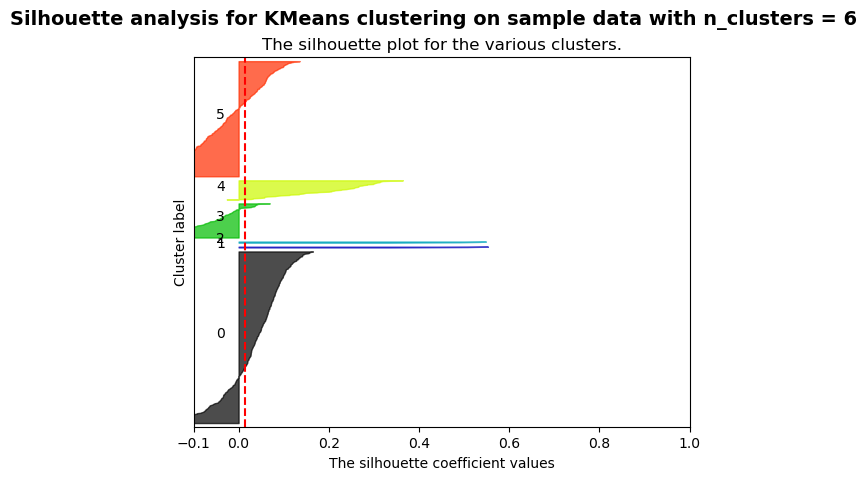

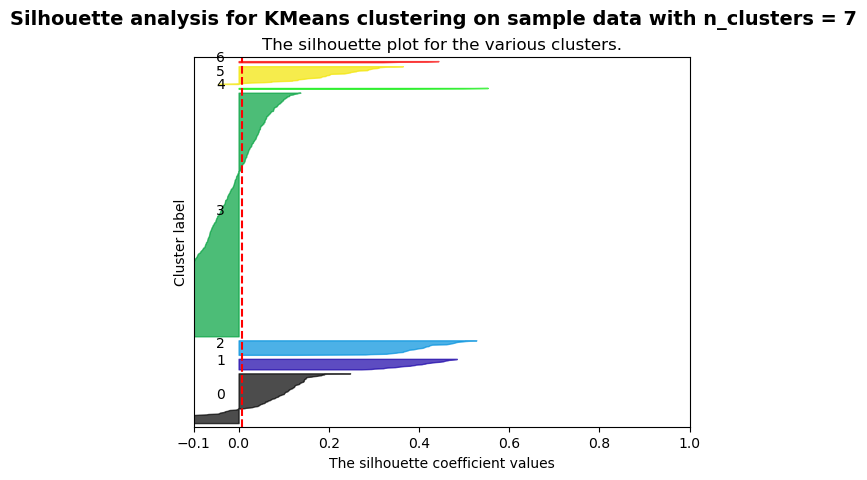

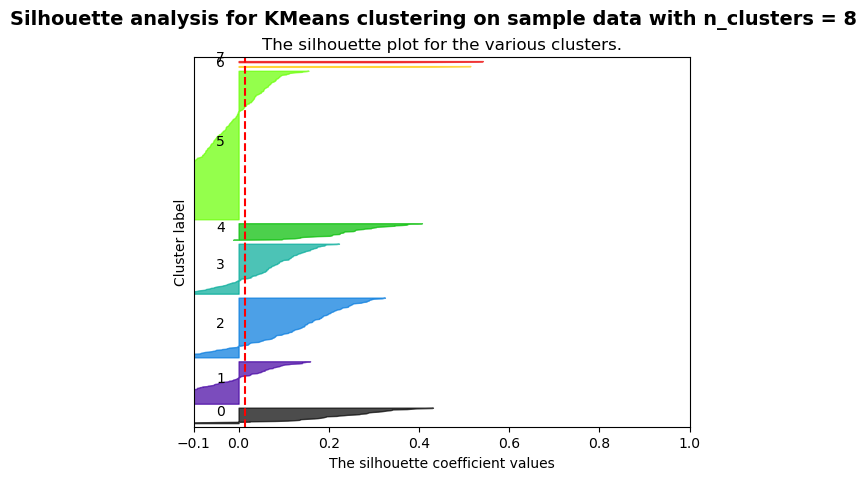

In [391]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = supercell.drop('CAT', axis=1)
# X = hail[['0-3SH', '0-9SH']]
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)


range_n_clusters = np.arange(2, 9)

for n_clusters in range_n_clusters:
    
    fig, ax1 = plt.subplots(1)

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto")
    # clusterer = GaussianMixture(n_components=n_clusters, covariance_type="spherical")
    clusterer = SpectralClustering(n_clusters=n_clusters, n_components=100)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 3], marker=".", s=30, lw=0.5, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [444]:
def plot_two_vars(data, clusters, var_1, var_2):
    
    sns.scatterplot(data=data, x=var_1, y=var_2, hue=clusters, palette='dark')

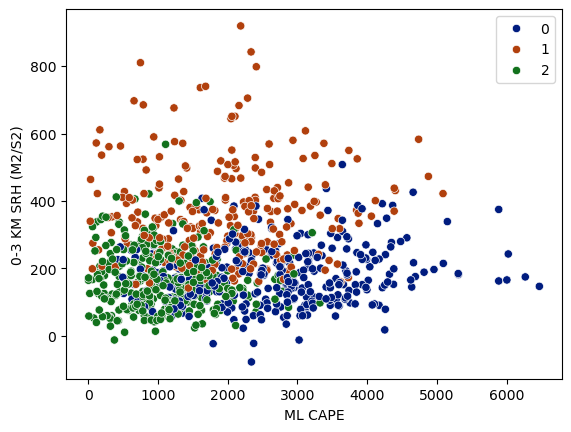

In [446]:
X = supercell.drop(['CAT', '500DIR'], axis=1)
km = KMeans(n_clusters=3)
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
clusters = km.fit_predict(scaled_X)

v1 = 'ML CAPE'
v2 = '0-3 KM SRH (M2/S2)'

plot_two_vars(data=X, 
              clusters=clusters, 
              var_1=v1,
              var_2=v2)

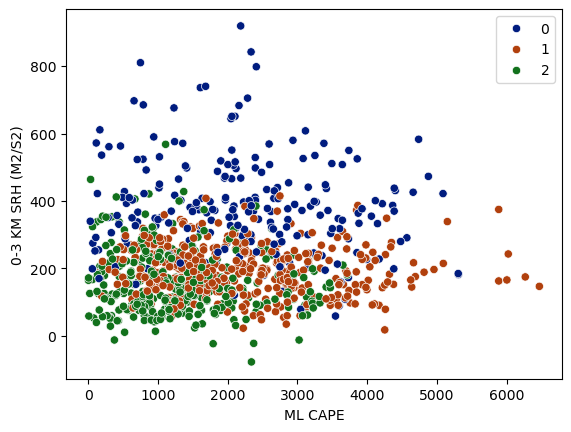

In [447]:
gmm = GaussianMixture(n_components=3)
clusters = gmm.fit_predict(scaled_X)

v1 = 'ML CAPE'
v2= '0-3 KM SRH (M2/S2)'

plot_two_vars(data=X, 
              clusters=clusters, 
              var_1=v1,
              var_2=v2)

In [419]:
supercell = supercell[supercell['ML CIN'] > -9998]